# seaborn 빈도그래프 (1)

statsmodels 패키지는 상관분석, 회귀분석 등 추론 통계의 기능을 제공한다.

In [3]:
from matplotlib import pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
from pandas import read_excel
import seaborn as sb
import numpy as np


다변량이란 x,y뿐 아니라 여러개의 변수를 가진 데이터를 말한다.
요인 = 데이터프레임의 컬럼(변수)


변수를 카테고리로 바꾸는게 왜 좋아용?
빈도 = 등장횟수 

카테고리형 데이터는 합계와 평균을 내는 데이터가 아니라 개수를 세는 데이터다. 남자 합계 x 남자 몇명 o
카테고리형 데이터는 빈도를 체크(count)하는데 의미를 둔다. 

col 은 그래프 값 
hue 그래프 안에서의 그룹핑을 수행할 명목 변수

seaborn은 여러 칼럼을 한번에 표현하려면 hue를 사용해서 해야함.  

seaborn 기본제공 파레트.
> deep, muted, pastel, bright, dark, colorblind, Spectral

In [5]:
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["axes.unicode_minus"] = False

### 데이터 준비하기

#### 타이타닉 탑승객 데이터

> 출처: https://www.kaggle.com/competitions/titanic

| 변수명 | 설명 |
|---|---|
| PassengerId | 탑승객의 ID(인덱스와 같은 개념) |
| Survived | 생존유무(0은 사망 1은 생존) |
| Pclass | 객실의 등급 |
| Name | 이름 |
| Sex |성별 |
| SibSp | 동승한 형제 혹은 배우자의 수 |
| Parch | 동승한 자녀 혹은 부모의 수 |
| Ticket | 티켓번호 |
| Fare | 요금 |
| Cabin | 선실 |
| Embarked | 탑승지 (C = Cherbourg, Q = Queenstown, S = Southampton) |

In [6]:
titanic = read_excel("https://data.hossam.kr/D01/titanic.xlsx",index_col='PassengerId')
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


데이터 전처리
- 범주형 데이터 처리

In [7]:
# 각 요인 별 데이터 타입 확인
titanic.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [9]:
# 범주형 데이터 처리 = 데이터 타입을 변경한다.
df = titanic.astype({"Survived":"category","Pclass":"category","Sex":"category","Cabin":"category","Embarked":"category"})
df.dtypes

Survived    category
Pclass      category
Name          object
Sex         category
Age          float64
SibSp          int64
Parch          int64
Ticket        object
Fare         float64
Cabin       category
Embarked    category
dtype: object

## 빈도 막대 그래프
병렬 막대그래프는 두 변량에 대한 빈도 막대그래프 2개를 각각의 캔버스에 병렬로 나열한 그래프를 말한다.
catplot() 메서드를 사용한다.
catplot()은 기본적으로 범주형 변수에 대한 그래프를 그리는데 사용되지만, 다양한 플롯 유형을 지원한다.

### 1. 기본 사용 방법
x축으로 집단을 구분할 수 있는 범주형 변수를 설정하고 kind='count' 파라미터를 설정한다. 그래프의 크기가 reParms속성의 영향을 받지 않아서 각각 catplot() 메소드로부터 객체를 리턴받아 개별적으로 수행해야 한다.

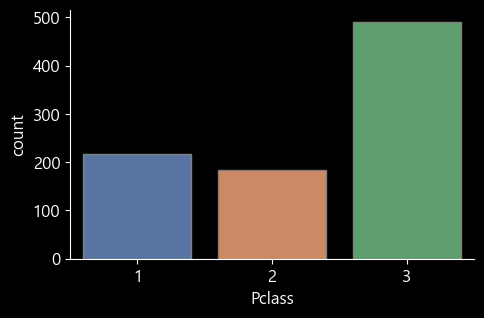

In [26]:
g = sb.catplot(data=df,
               x='Pclass',# 확인할 데이터
               kind= "count", # 그래프 종류
               palette='deep',
               edgecolor='0.5' # 막대 테두리 색상 투명도 지정(0 불투명 0.5 반투명, 1투명)
               ) 
g.fig.set_figwidth(5)
g.fig.set_figheight(3)

plt.show()


## 범례 기준 추가
- 각 막대를 구분할 수 잇는 범주형 변수를 hue 파라미터로 추가
- kind : 그래프의류는 범주형 축 수준 플로팅 함수의 이름(그래프 형태에 관여함)
- "strip", "swarm", "box", "violin", "boxen", "point", "bar" 또는 "count"

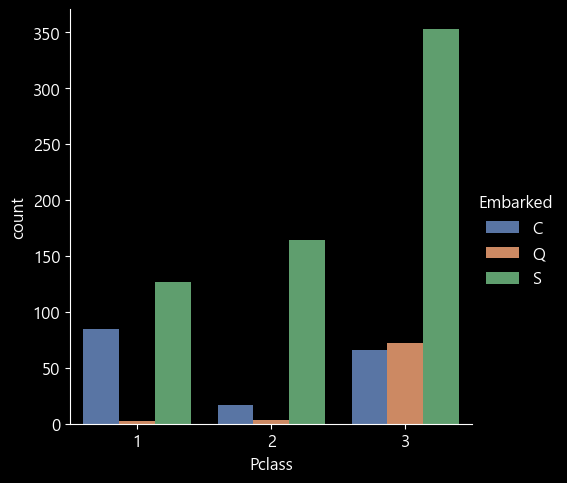

In [27]:
# 객실 등급별 탑승 지역 빈도

sb.catplot(data=df,
           x="Pclass", # 집단을 구분하는 기준
           kind='count', # 빈도 막대그래프 그리기
           palette='deep',
           hue='Embarked')
plt.show()

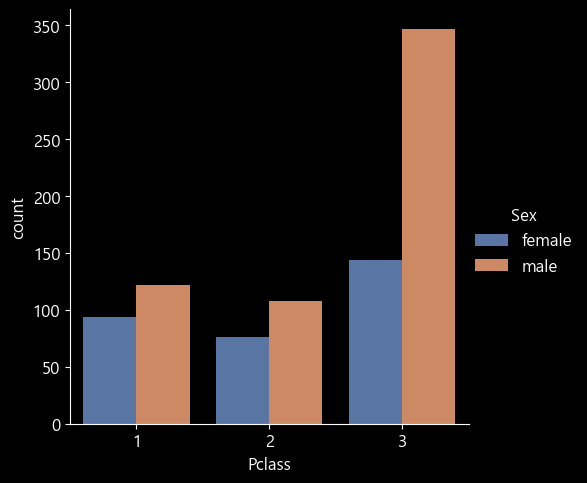

In [28]:
# 객실 등급별 성별 빈도

sb.catplot(data=df,
           x="Pclass", # 집단을 구분하는 기준
           kind='count', # 빈도 막대그래프 그리기
           palette='deep',
           hue='Sex')
plt.show()

## 3. 병렬 빈도 막대 그래프
- 이미 범주가 주어진 상황에서 추가적인 범주를 표현하고자 할 때 그래프를 두 개로 분리, 병렬 막대그래프는 두 변량에 대한 빈도 막대그래프 2개를 각가의 캔버스에 병렬로 나열한 그래프 
- Seaborn으로 병렬 빈도 막대그래프를 그리려면 sns.catplot 함수에 kind='count'와 col 옵션을 추가한다. 

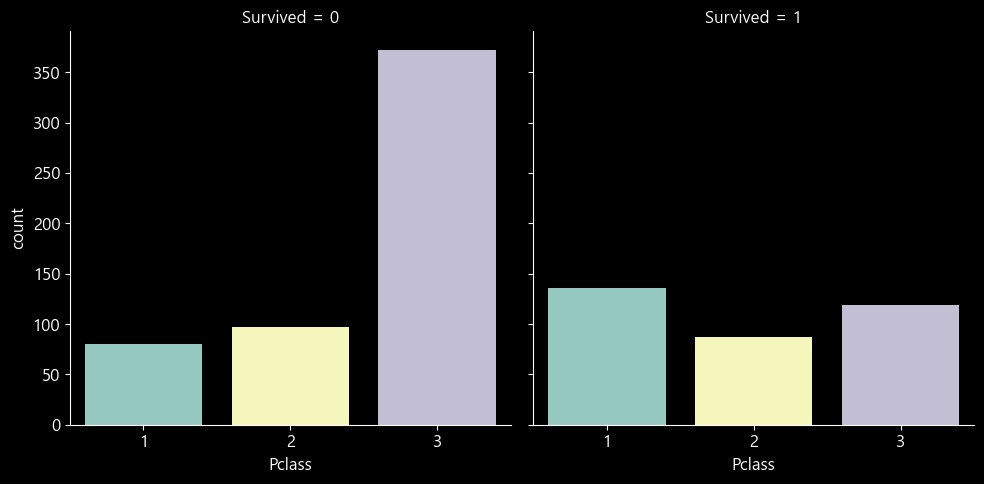

In [37]:
sb.catplot(data=df,
            x='Pclass',
            col='Survived',   # 캔버스 분리하기
            kind='count' # 빈도 막대그래프 그리기
        )
plt.show()

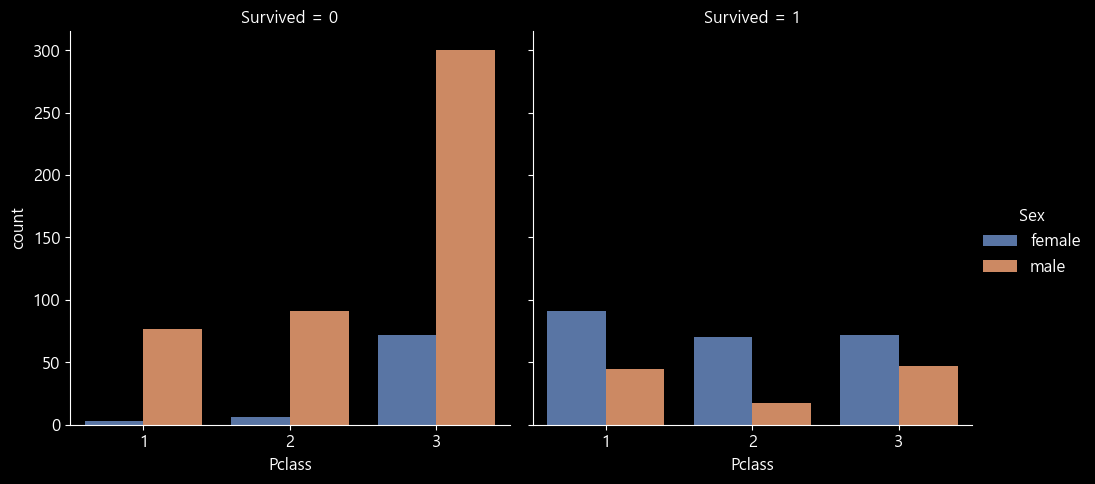

In [30]:
# 객실 등급에 따른 생존 여부를 두 개의 그래프로 분리

sb.catplot(data=df,
           x="Pclass",
           col = 'Survived', # 캔버스 분리하기
           kind='count', # 빈도 막대그래프 그리기
           palette='deep',
           hue='Sex')
plt.show()

## 가로 빈도 막대 그래프
- x 파라미터 대신 y 파라미터를 사용한다.

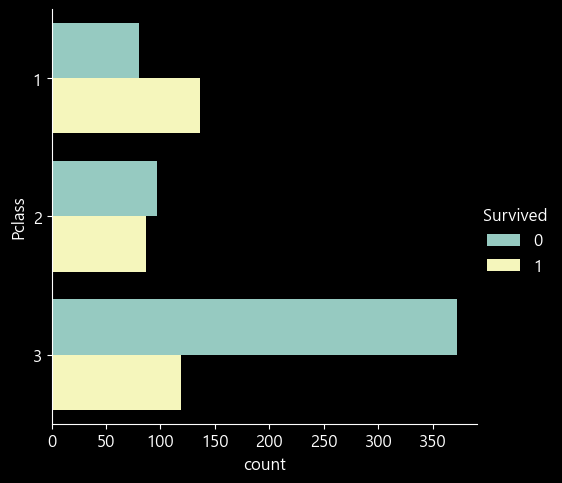

In [40]:
g = sb.catplot(data=df,
            y='Pclass', # 여기만 바꾸면 됨
            hue ='Survived',   
            kind='count' # 빈도 막대그래프 그리기
        )
plt.show()

g.fig.set_figwidth(7)
g.fig.set_figwidth(3)

plt.show()
